In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
file_name_dataset = 'advertising (2).csv'

data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()

In [ ]:
print(data)

[[230.1, 37.8, 69.2, 22.1], [44.5, 39.3, 45.1, 10.4], [17.2, 45.9, 69.3, 12.0], [151.5, 41.3, 58.5, 16.5], [180.8, 10.8, 58.4, 17.9], [8.7, 48.9, 75.0, 7.2], [57.5, 32.8, 23.5, 11.8], [120.2, 19.6, 11.6, 13.2], [8.6, 2.1, 1.0, 4.8], [199.8, 2.6, 21.2, 15.6], [66.1, 5.8, 24.2, 12.6], [214.7, 24.0, 4.0, 17.4], [23.8, 35.1, 65.9, 9.2], [97.5, 7.6, 7.2, 13.7], [204.1, 32.9, 46.0, 19.0], [195.4, 47.7, 52.9, 22.4], [67.8, 36.6, 114.0, 12.5], [281.4, 39.6, 55.8, 24.4], [69.2, 20.5, 18.3, 11.3], [147.3, 23.9, 19.1, 14.6], [218.4, 27.7, 53.4, 18.0], [237.4, 5.1, 23.5, 17.5], [13.2, 15.9, 49.6, 5.6], [228.3, 16.9, 26.2, 20.5], [62.3, 12.6, 18.3, 9.7], [262.9, 3.5, 19.5, 17.0], [142.9, 29.3, 12.6, 15.0], [240.1, 16.7, 22.9, 20.9], [248.8, 27.1, 22.9, 18.9], [70.6, 16.0, 40.8, 10.5], [292.9, 28.3, 43.2, 21.4], [112.9, 17.4, 38.6, 11.9], [97.2, 1.5, 30.0, 13.2], [265.6, 20.0, 0.3, 17.4], [95.7, 1.4, 7.4, 11.9], [290.7, 4.1, 8.5, 17.8], [266.9, 43.8, 5.0, 25.4], [74.7, 49.4, 45.7, 14.7], [43.1, 26.7

In [ ]:
def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [ ]:
# Exercise 1
X, y = prepare_data('advertising (2).csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum (y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [ ]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(xi, y_hat, y):
    return 2 * xi * (y_hat - y)

def compute_gradient_b(y_hat, y):
    return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

In [ ]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [ ]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [ ]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [ ]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [ ]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [ ]:
after_b = update_weight_b(b =0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses= []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y_hat, y)
            dl_dw2 = compute_gradient_wi(x2, y_hat, y)
            dl_dw3 = compute_gradient_wi(x3, y_hat, y)
            dl_db = compute_gradient_b(y_hat, y)

            # update weight
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

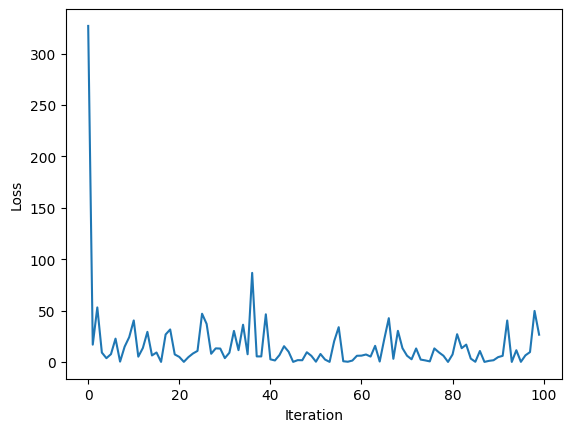

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X_data=X, y_data=y)
plt.plot(losses[:100])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
X, y = prepare_data('advertising (2).csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X_data=X, y_data=y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [ ]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising (2).csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=1000, lr=1e-5):
    losses= []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # accumualate loss
            loss_total += loss

            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y_hat, y)
            dl_dw2 = compute_gradient_wi(x2, y_hat, y)
            dl_dw3 = compute_gradient_wi(x3, y_hat, y)
            dl_db = compute_gradient_b(y_hat, y)

            # accumulate gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

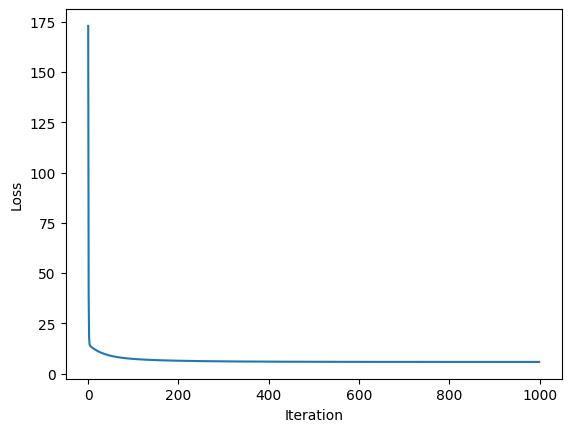

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X_data=X, y_data=y)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
X, y = prepare_data('advertising (2).csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [ ]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

In [ ]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return [bias , w1 , w2 , w3]

In [ ]:
def predict(X_features, weights):
    result = [x1*x2 for x1, x2 in zip(X_features, weights)]
    return sum(result)

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * (y_hat - y) * X_features[i] for i in range(len(X_features))]
    return dl_dweights

def update_weight(weights , dl_dweights , lr):
    weights = [w - lr * dl_dw for w, dl_dw in zip(weights, dl_dweights)]
    return weights

In [ ]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            feature_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(feature_i, weights)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient
            dl_dweights = compute_gradient_w(feature_i, y, y_hat)

            # update weight
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

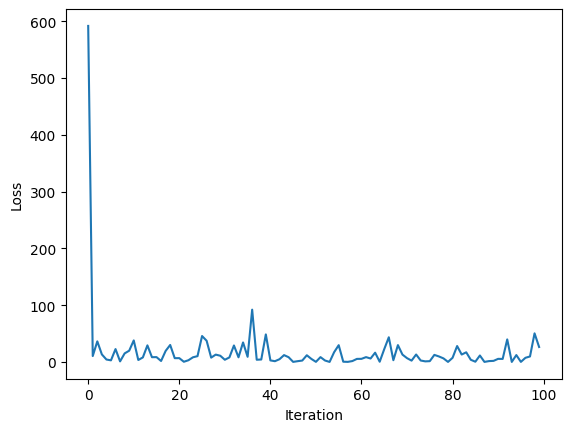

In [ ]:
X, y = prepare_data('advertising (2).csv')
(weights, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
plt.plot(losses[:100])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
X, y = prepare_data('advertising (2).csv')
W, L = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.339223408109948
